# 1 . For the function J(w) = w^2 + (54/w), implement the following methods:
(a) Use the bracketed value (that you got in the last lab) to get to the critical point employing interval halving method and (b) identify the critical point using Newton-Raphson method and (c) verify the result manually using the optimality criteria (post this write-up as well in .jpg/.png etc).

In [2]:
def J(w):    # computing the function value.
    val = w**2 + (54/w)
    return val

def J_1(w):   # computing the first order derivative
    val = 2*w - (54/(w**2))
    return val

def J_2(w):     # computing the second order derivative.
    val = 2 + (108/(w**3))
    return val

def bracketing_method(a, b, n):   
    dw = (b - a)/n
    w1 = a
    w2 = w1 + dw
    w3 = w2 + dw
    while(w3 <= b):
        if((J(w1) >= J(w2)) and (J(w2) <= J(w3))):
            print(f'Minimum lies between ({w1}, {w3})')
            return w1, w3
        else:
            w1 = w2
            w2 = w3
            w3 = w3 + dw
    print(f'Minimum does not lie in ({a}, {b}). Min could be one of the bdry points.')
    return None

def Region_elimination(a, b):
    L = b - a
    eps = 10e-5
    w_m = (a+b)/2
    while(L > eps):
        w_1 = a + L/4
        w_2 = b - L/4
        if(J(w_1) < J(w_m)):
            b = w_m
            w_m = w_1
        elif(J(w_2) < J(w_m)):
            a = w_m
            w_m = w_2
        else:
            a = w_1
            b = w_2   
        L = b - a
    return a

def Newton_Raphson(w):
    print(f'The initial point for Newton_Raphson method is {w}')
    eps = 10e-10
    first_order = J_1(w)
    while(abs(first_order) > eps):
        second_order = J_2(w)
        w = w - (first_order/second_order)
        first_order = J_1(w)
    return w
        
        
            
a, b = input('Enter the interval:').split()
a = float(a)
b = float(b)

n = int(input('Enter the number of subintervals: '))
interval = bracketing_method(a, b, n)

print('\n')
if(interval):
    root1 = Region_elimination(interval[0], interval[1])
    print(f'The critical point by interval halving method is {root1}')
    
    print('\n')
    root2 = Newton_Raphson(interval[0])
    print(f'The critical point by Newton Raphson method is {root2}')
else:
    pass

Enter the interval:1 5
Enter the number of subintervals: 50
Minimum lies between (2.9200000000000017, 3.080000000000002)


The critical point by interval halving method is 2.999960937500002


The initial point for Newton_Raphson method is 2.9200000000000017
The critical point by Newton Raphson method is 2.999999999999177


# 2.  Plot the surface J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2. Also, generated the corresponding contour plot. Label the plots appropriately. Give a suitable title for the figure. 

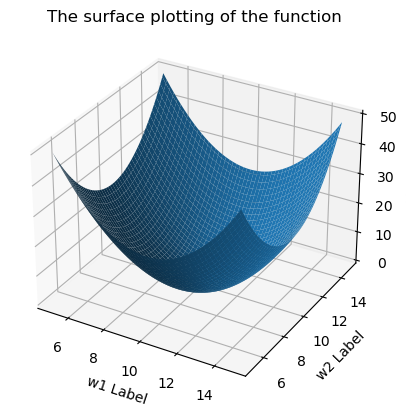

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

w1 = np.arange(5, 15, 0.1)
w2 = np.arange(5, 15, 0.1)
W1, W2 = np.meshgrid(w1, w2)  #Forming MeshGrid

J = (W1 - 10)**2 + (W2 - 10)**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, J)
ax.set_xlabel('w1 Label')
ax.set_ylabel('w2 Label')
ax.set_zlabel('J Label')
ax.set_title('The surface plotting of the function')

plt.show()

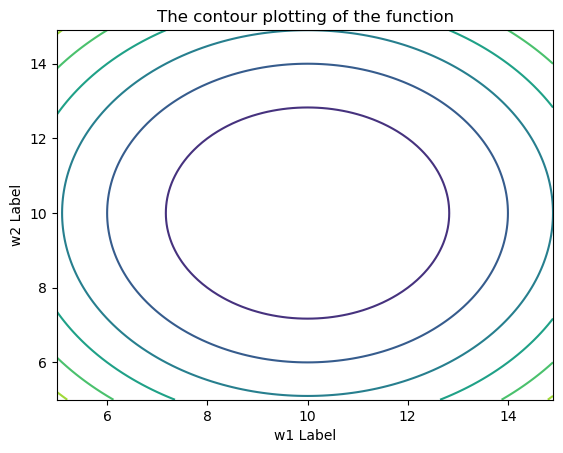

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

w1 = np.arange(5, 15, 0.1)
w2 = np.arange(5, 15, 0.1)
W1, W2 = np.meshgrid(w1, w2)  #Forming MeshGrid

J = (W1 - 10)**2 + (W2 - 10)**2

fig, ax = plt.subplots(1, 1) 
ax.contour(W1, W2, J)
ax.set_xlabel('w1 Label')
ax.set_ylabel('w2 Label')
ax.set_title('The contour plotting of the function')

plt.show()

# 3. Using line (unidirectional) search, for the function (w1 - 10 )^2 + (w2 - 10)^2.
find the minimum value along the direction (2, 5). You can assume the start point to be (2,1).  Plot the function and its contours along with the minimum value in that direction.

Enter the number of subinterval : 50
Minimum lies between (1.9999999999999998, 2.4)
The optimum value of the alpha is 2.1034179687499996
The optimum point in the direction : (6.206835937499999,11.517089843749998)
In the direction, the minimum value is 16.689655199050904


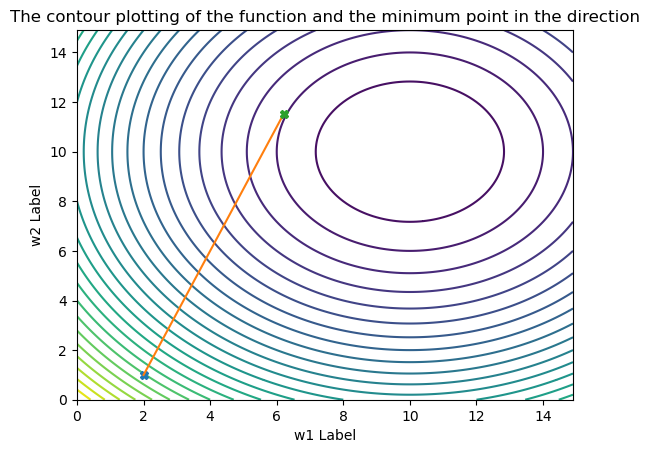

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

def phi(w):
    val = (w[0] - 10)**2 + (w[1] - 10)**2
    return val

def bracketing_method_alpha(w_start, direction, a, b, n):
    d_alpha = (b - a)/n
    w1 = a
    w2 = w1 + d_alpha
    w3 = w2 + d_alpha
    while(w3 <= b):
        x = w_start + w1*direction
        y = w_start + w2*direction
        z = w_start + w3*direction
        if((phi(x) >= phi(y)) and (phi(y) <= phi(z))):
            print(f'Minimum lies between ({w1}, {w3})')
            return w1, w3
        else:
            w1 = w2
            w2 = w3
            w3 = w3 + d_alpha
    print(f'Minimum does not lie in ({a}, {b}). Min could be one of the bdry points.')
    return None

def Region_elimination_alpha(w_start, direction, a, b):
    L = b - a
    eps = 10e-5
    w_m = (a+b)/2
    while(L > eps):
        w_1 = a + L/4
        w_2 = b - L/4
        x = w_start + w_1*direction
        y = w_start + w_m*direction
        z = w_start + w_2*direction
        if(phi(x) < phi(y)):
            b = w_m
            w_m = w_1
        elif(phi(z) < phi(y)):
            a = w_m
            w_m = w_2
        else:
            a = w_1
            b = w_2   
        L = b - a
    return a


def Unidirectional(w_start , direction, n):
    alpha_1 = 0
    alpha_2 = 10
    interval = bracketing_method_alpha(w_start, direction, alpha_1, alpha_2, n)
    
    if(interval):
        pt = Region_elimination_alpha(w_start, direction, interval[0], interval[1])
        return pt
    else:
        return None

w_start = np.array([2, 1])
direction = np.array([2, 5])
n = int(input('Enter the number of subinterval : '))
alpha_val = Unidirectional(w_start, direction, n)

if(alpha_val):
    print(f'The optimum value of the alpha is {alpha_val}')
    print(f'The optimum point in the direction : ({w_start[0] + alpha_val*direction[0]},{w_start[1] + alpha_val*direction[1]})')
    print(f'In the direction, the minimum value is {phi(w_start + alpha_val*direction)}')
    w1 = np.arange(0, 15, 0.1)
    w2 = np.arange(0, 15, 0.1)
    W1, W2 = np.meshgrid(w1, w2)  #Forming MeshGrid

    J = (W1 - 10)**2 + (W2 - 10)**2

    fig, ax = plt.subplots(1, 1) 
    ax.contour(W1, W2, J, 30)
    x = np.linspace(w_start[0], w_start[0] + alpha_val*direction[0], 20)
    y = np.linspace(w_start[1], w_start[1] + alpha_val*direction[1], 20)
    ax.plot(w_start[0], w_start[1], "X")
    ax.plot(x, y)
    ax.plot((w_start[0] + alpha_val*direction[0]), (w_start[1] + alpha_val*direction[1]), "X")
    ax.set_xlabel('w1 Label')
    ax.set_ylabel('w2 Label')
    ax.set_title('The contour plotting of the function and the minimum point in the direction')
    plt.show()
else:
    pass